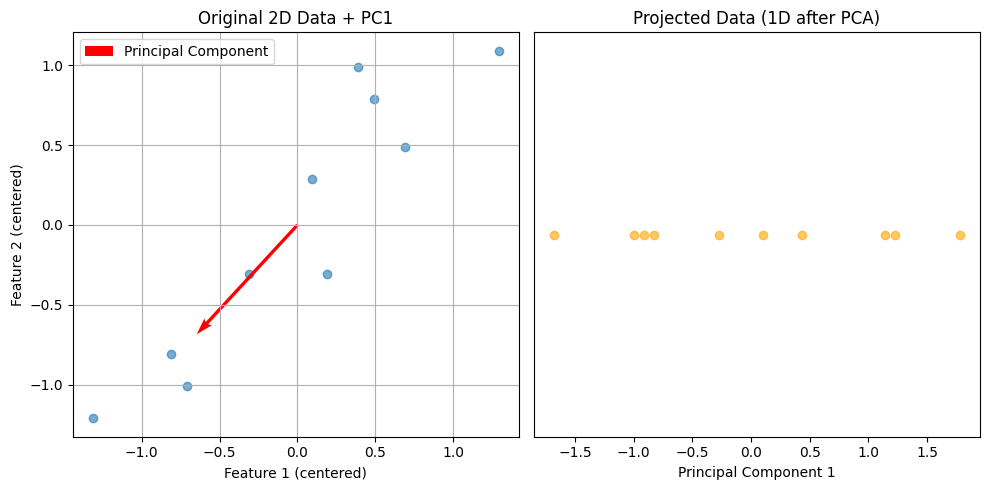

Old 2D data:
[[2.5 2.4]
 [0.5 0.7]
 [2.2 2.9]
 [1.9 2.2]
 [3.1 3. ]
 [2.3 2.7]
 [2.  1.6]
 [1.  1.1]
 [1.5 1.6]
 [1.1 0.9]] 
New 1D transformed data:
[-0.82797019  1.77758033 -0.99219749 -0.27421042 -1.67580142 -0.9129491
  0.09910944  1.14457216  0.43804614  1.22382056] 


In [4]:
# Following is an application of eigen values/vesor in PCA

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create simple 2D data (pretend 2 features: height and weight)
X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2, 1.6],
    [1, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
])

# Step 2: Center the data (remove the mean)
X_meaned = X - np.mean(X, axis=0)

# Step 3: Compute the covariance matrix
cov_matrix = np.cov(X_meaned, rowvar=False)

# Step 4: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 5: Choose the top eigenvector (principal component)
idx = np.argsort(eigenvalues)[::-1]
principal_component = eigenvectors[:, idx[0]]

# Step 6: Project data onto principal component (1D representation)
X_reduced = X_meaned @ principal_component

####################################################
# Plot original and projected data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_meaned[:, 0], X_meaned[:, 1], alpha=0.6)
plt.quiver(0, 0, principal_component[0], principal_component[1],
           color='r', scale=3, label='Principal Component')
plt.title("Original 2D Data + PC1")
plt.xlabel('Feature 1 (centered)')
plt.ylabel('Feature 2 (centered)')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_reduced, np.zeros_like(X_reduced), color='orange', alpha=0.6)
plt.title("Projected Data (1D after PCA)")
plt.xlabel('Principal Component 1')
plt.yticks([])

plt.tight_layout()
plt.show()
############################################

print(f"Old 2D data:\n{X} ")
print(f"New 1D transformed data:\n{X_reduced} ")